In [117]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from sklearn.impute import SimpleImputer

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
df = pd.read_csv(r'C:\Users\Yersaiyn\Desktop\UMass\Projects\AlexTheAnalystProjects\Python #4\movies.csv')

In [166]:
# Let's look at the data
df.info()

#we have 7668 movies to look at... exciting!

,year,score,votes,budget,gross,runtime,yearcorrect
count,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000,7668.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613,2000.624054
std,11.153508,0.968652,1.632918e+05,3.510036e+07,1.636697e+08,18.576400,11.161352
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000,1980.000000
25%,1991.000000,5.800000,9.100000e+03,1.400000e+07,4.681151e+06,95.000000,1991.000000
50%,2000.000000,6.500000,3.300000e+04,3.558988e+07,2.141330e+07,104.000000,2001.000000
75%,2010.000000,7.100000,9.300000e+04,3.558988e+07,7.850054e+07,116.000000,2010.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020.000000


In [168]:
df.describe()

,year,score,votes,budget,gross,runtime,yearcorrect
count,7668.000000,7668.000000,7.668000e+03,7.668000e+03,7.668000e+03,7668.000000,7668.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613,2000.624054
std,11.153508,0.968652,1.632918e+05,3.510036e+07,1.636697e+08,18.576400,11.161352
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000,1980.000000
25%,1991.000000,5.800000,9.100000e+03,1.400000e+07,4.681151e+06,95.000000,1991.000000
50%,2000.000000,6.500000,3.300000e+04,3.558988e+07,2.141330e+07,104.000000,2001.000000
75%,2010.000000,7.100000,9.300000e+04,3.558988e+07,7.850054e+07,116.000000,2010.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020.000000


In [170]:
df.shape

(7668, 16)

In [121]:
# Let's see if there is any missing data and let's use imputer to get rid of nulls

imputer = SimpleImputer(strategy='mean')
df['votes'] = imputer.fit_transform(df[['votes']])
df['budget'] = imputer.fit_transform(df[['budget']])
df['gross'] = imputer.fit_transform(df[['gross']])
df['runtime'] = imputer.fit_transform(df[['runtime']])
df['score'] = imputer.fit_transform(df[['score']])

df['rating'] = df['rating'].fillna('Unknown')
df['released'] = df['released'].fillna('Unknown')
df['writer'] = df['writer'].fillna('Unknown')
df['star'] = df['star'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')

print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [123]:
#Change data types of columns to integers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [125]:
#Year column had wrong values, we create a new column by taking correct years from Release column 
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
df['yearcorrect'] = imputer.fit_transform(df[['yearcorrect']])

In [127]:
#order

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

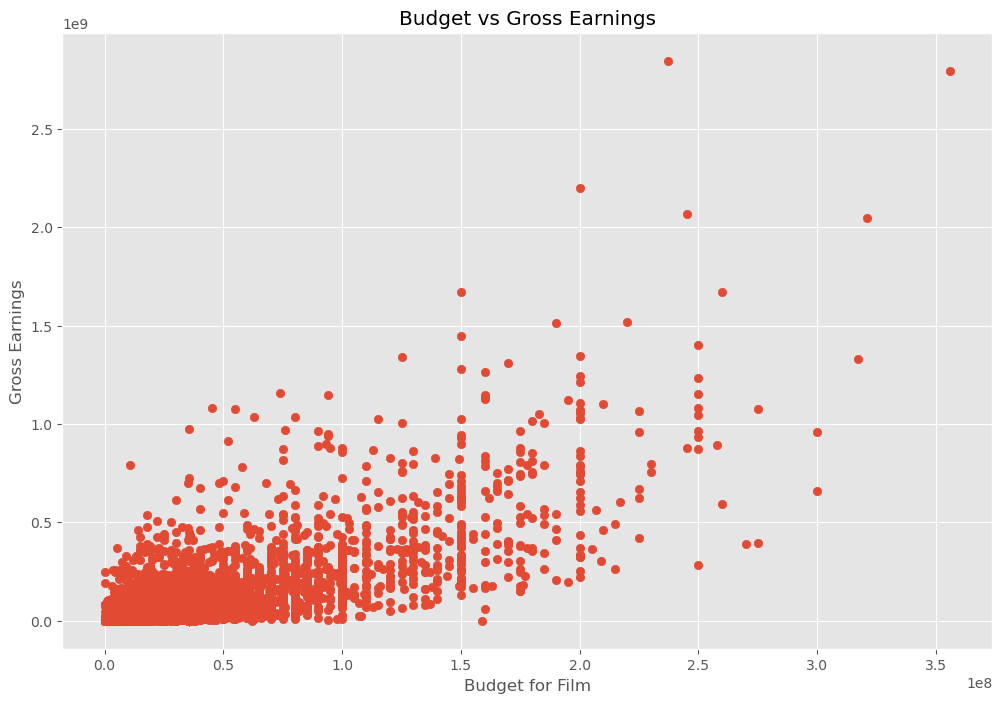

In [129]:
# Scatter plot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [131]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018.0


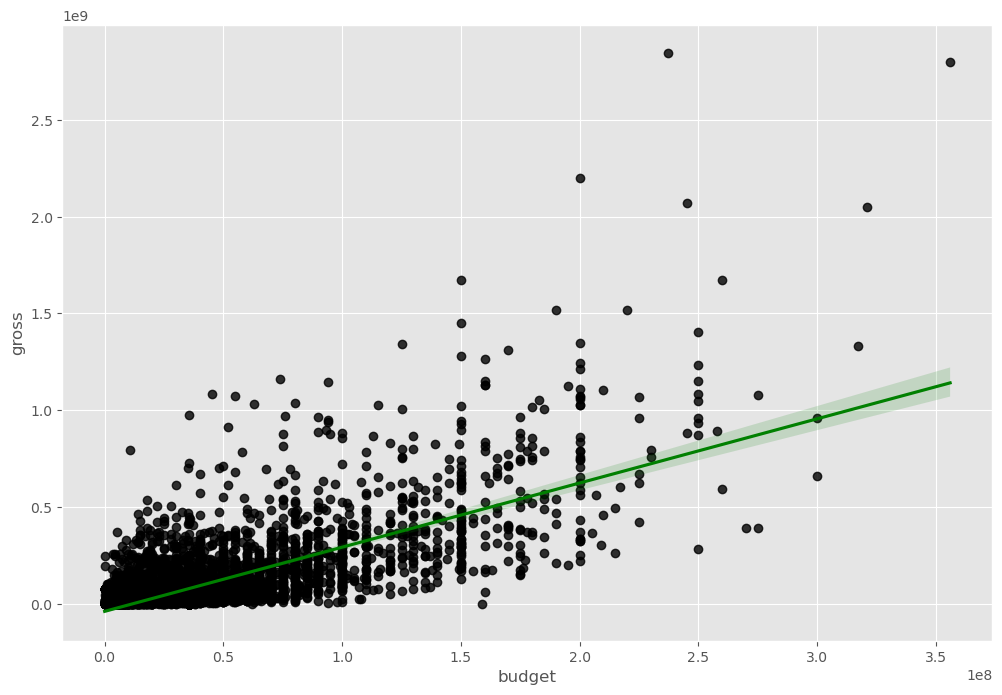

In [133]:
#Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color":"green"})
plt.show()

In [134]:
#Let's look at correlation

df[['budget','gross','runtime','score','votes','yearcorrect']].corr(method='pearson') #Pearson

#high correlation between budget and gross found

,budget,gross,runtime,score,votes,yearcorrect
budget,1.000000,0.711270,0.265287,0.064541,0.421007,0.259546
gross,0.711270,1.000000,0.241335,0.182868,0.628713,0.245462
runtime,0.265287,0.241335,1.000000,0.399329,0.309166,0.120604
score,0.064541,0.182868,0.399329,1.000000,0.409182,0.105924
votes,0.421007,0.628713,0.309166,0.409182,1.000000,0.218300
yearcorrect,0.259546,0.245462,0.120604,0.105924,0.218300,1.000000


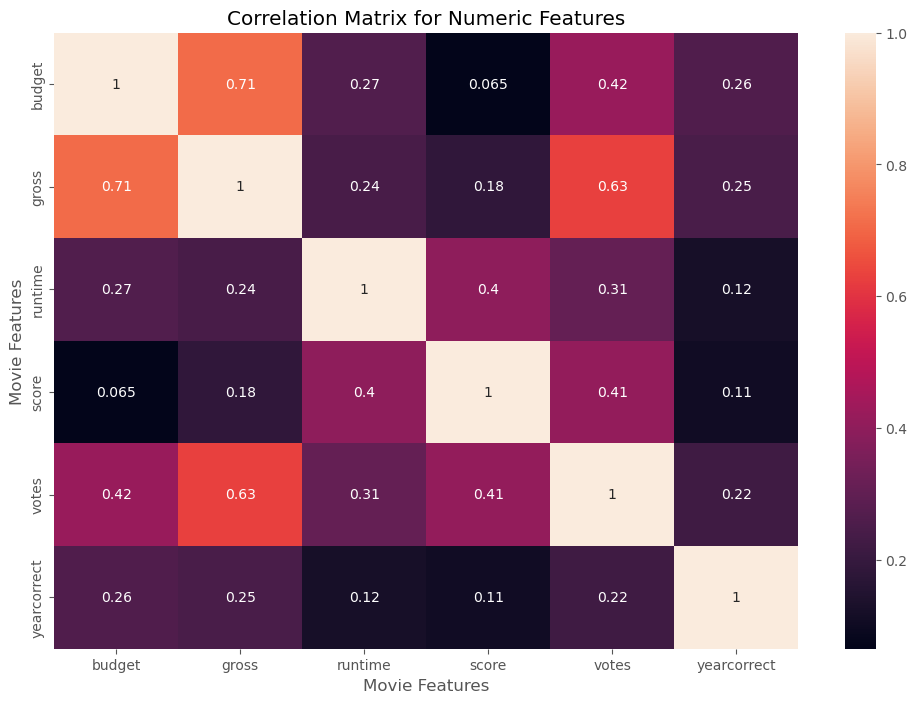

In [137]:
correlation_matrix = df[['budget','gross','runtime','score','votes','yearcorrect']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [143]:
# let's convert all columns to numbers to be able to look at correlation among all columns 

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009.0
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,2019.0
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997.0
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,2015.0
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,2018.0


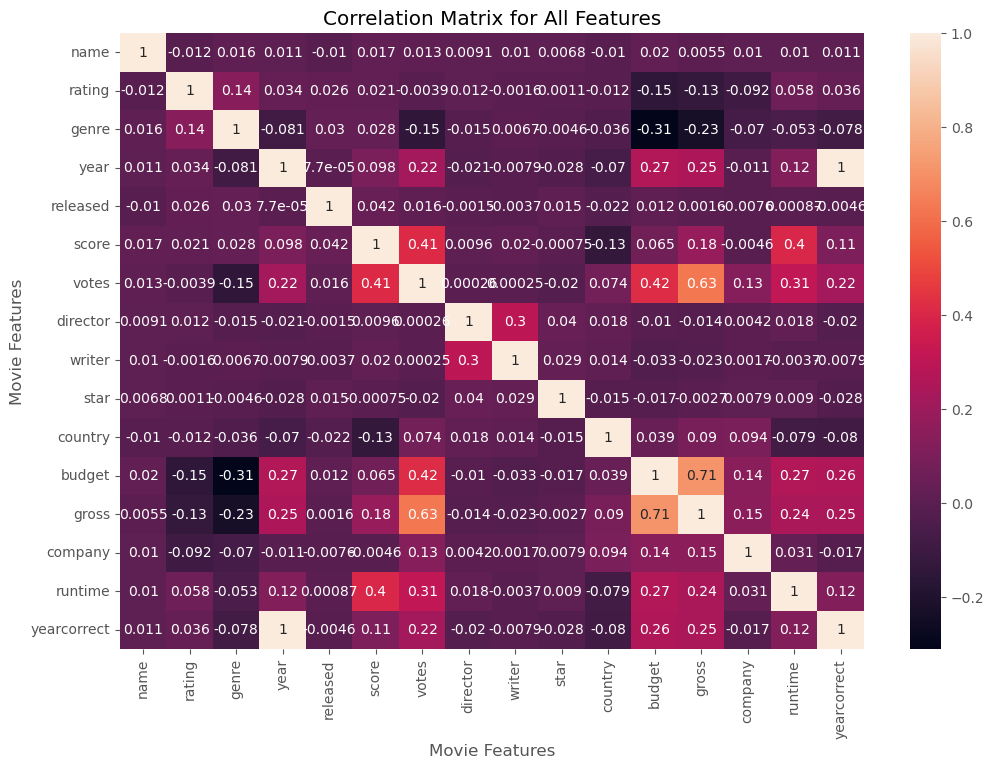

In [147]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [159]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_correlation = sorted_pairs[sorted_pairs > 0.5]

high_correlation

#votes and budget have the highest correlation to gross earnings
#other factors have low correlation

votes        gross          0.628713
gross        votes          0.628713
budget       gross          0.711270
gross        budget         0.711270
yearcorrect  year           0.997319
year         yearcorrect    0.997319
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64